8.5. The following data set shows population of the United States (in million) since 1790,

|  |   |   |   |   |   |   |   |   |   |   |   |
|:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Year|1790|1800|1810|1820|1830|1840|1850|1860|1870|1880|1890|1900|
|Population|3.9|5.3|7.2|9.6|12.9|17.1|23.2|31.4|38.6|50.2|63.0|76.2|
|Year|1910|1920|1930|1940|1950|1960|1970|1980|1990|2000|2010|
|Population|92.2|106.0|123.2|132.2|151.3|179.3|203.3|226.5|248.7|281.4| 308.7|

Construct a time plot for the U.S. population. What kind of trend do you see? What information can be extracted from this plot?

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Get the data into a Pandas dataframe for easy processing
year = np.array([1790,1800,1810,1820,1830,1840,1850,1860,
                  1870,1880,1890,1900,1910,1920,1930,1940,
                  1950,1960,1970,1980,1990,2000,2010])
pop = np.array([3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,
                38.6,50.2,63.0,76.2,92.2,106.0,123.2,
                132.2,151.3,179.3,203.3,226.5,248.7,281.4, 308.7,])

df = pd.DataFrame({'population':pop}, index=year)
df.head()

,population
1790,3.9
1800,5.3
1810,7.2
1820,9.6
1830,12.9


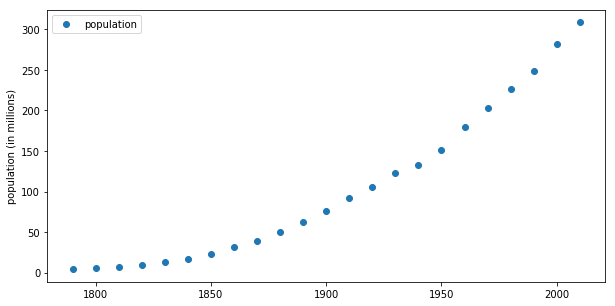

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
_ = df.plot(marker='o', linestyle="none", ax=ax)
_ = ax.set_ylabel("population (in millions)")


8.6. Refer to Exercise 8.5. Compute 10-year increments of the population growth x1 = 5.3−3.9,
x2 = 7.2 − 5.3, etc.

In [5]:
df['increment'] = df['population'].diff()
df.head()

,population,increment
1790,3.9,NaN
1800,5.3,1.4
1810,7.2,1.9
1820,9.6,2.4
1830,12.9,3.3


(a) Compute sample mean, median, and variance of 10-year increments. Discuss how the
U.S. population changes during a decade.

In [6]:
df['increment'].mean(), df['increment'].median(), df['increment'].var()


(13.854545454545455, 13.0, 87.60354978354978)

(b) Construct a time plot of 10-year increments and discuss the observed pattern.

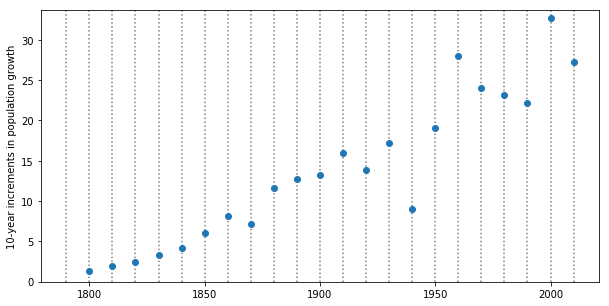

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = df['increment'].plot(marker='o', linestyle="none", ax=ax)
_ = ax.set_ylabel("10-year increments in population growth")
_ = ax.vlines(df.index, ymin=0, ymax=df['increment'].max()+1, color='gray', linestyle=':', zorder=-1)
_ = ax.set_ylim(0, df['increment'].max()+1)

8.7. Refer to Exercise 8.5. Compute 10-year relative population change y1 = (5.3 − 3.9)/3.9,
y2 = (7.2 − 5.3)/5.3, etc.

In [8]:
#skip the first value of increments 'cause it's not a number and skip the last population number 
df['relative'] = df['population'].pct_change()

# alternative way if you want to manually do the computation:
relative = (df['increment'].shift(-1) / df['population'])
relative.head()

1790    0.358974
1800    0.358491
1810    0.333333
1820    0.343750
1830    0.325581
dtype: float64

(a) Compute sample mean, median, and variance of the relative population change.

In [10]:
df['relative'].mean(), df['relative'].median(), df['relative'].var()


(0.22380057356285804, 0.20974878140232478, 0.01025037990513498)

(b) Construct a time plot of the relative population change. What trend do you see now?

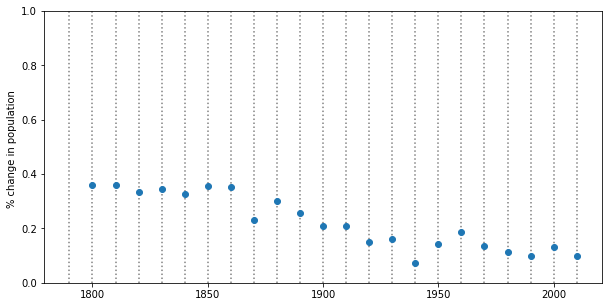

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = df['relative'].plot(marker='o', linestyle="none", ax=ax)
_ = ax.set_ylabel("% change in population ")
_ = ax.vlines(df.index, ymin=0, ymax=1, color='gray', linestyle=':', zorder=-1)
_ = ax.set_ylim(0, 1)

(c) Comparing the time plots in Exercises 8.6 and 8.7, what kind of correlation between
xi and yi would you expect? Verify by computing the sample correlation coefficient

$$
r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})/(n-1)}}{s_xs_y}
$$
What can you conclude? How would you explain this phenomenon?

In [12]:
df[['increment', 'relative']].corr()

,increment,relative
increment,1.00000,-0.78842
relative,-0.78842,1.00000
